In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
model = models.Sequential()

In [7]:
files = ['Consumable', 'Non-Consumable']
address = 'D:/VIT/Meat-Quality-Assessment-and-Classification/Dataset/Fish/'

In [8]:
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

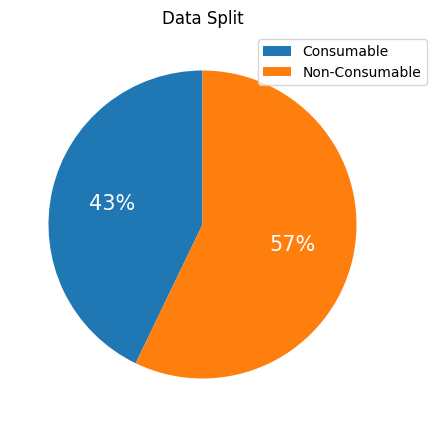

In [9]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [10]:
width = 100
height = 100

In [11]:
start = time.time()
image_data = []
image_target = []
for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 38.1058


In [12]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(140, 100, 100, 3)

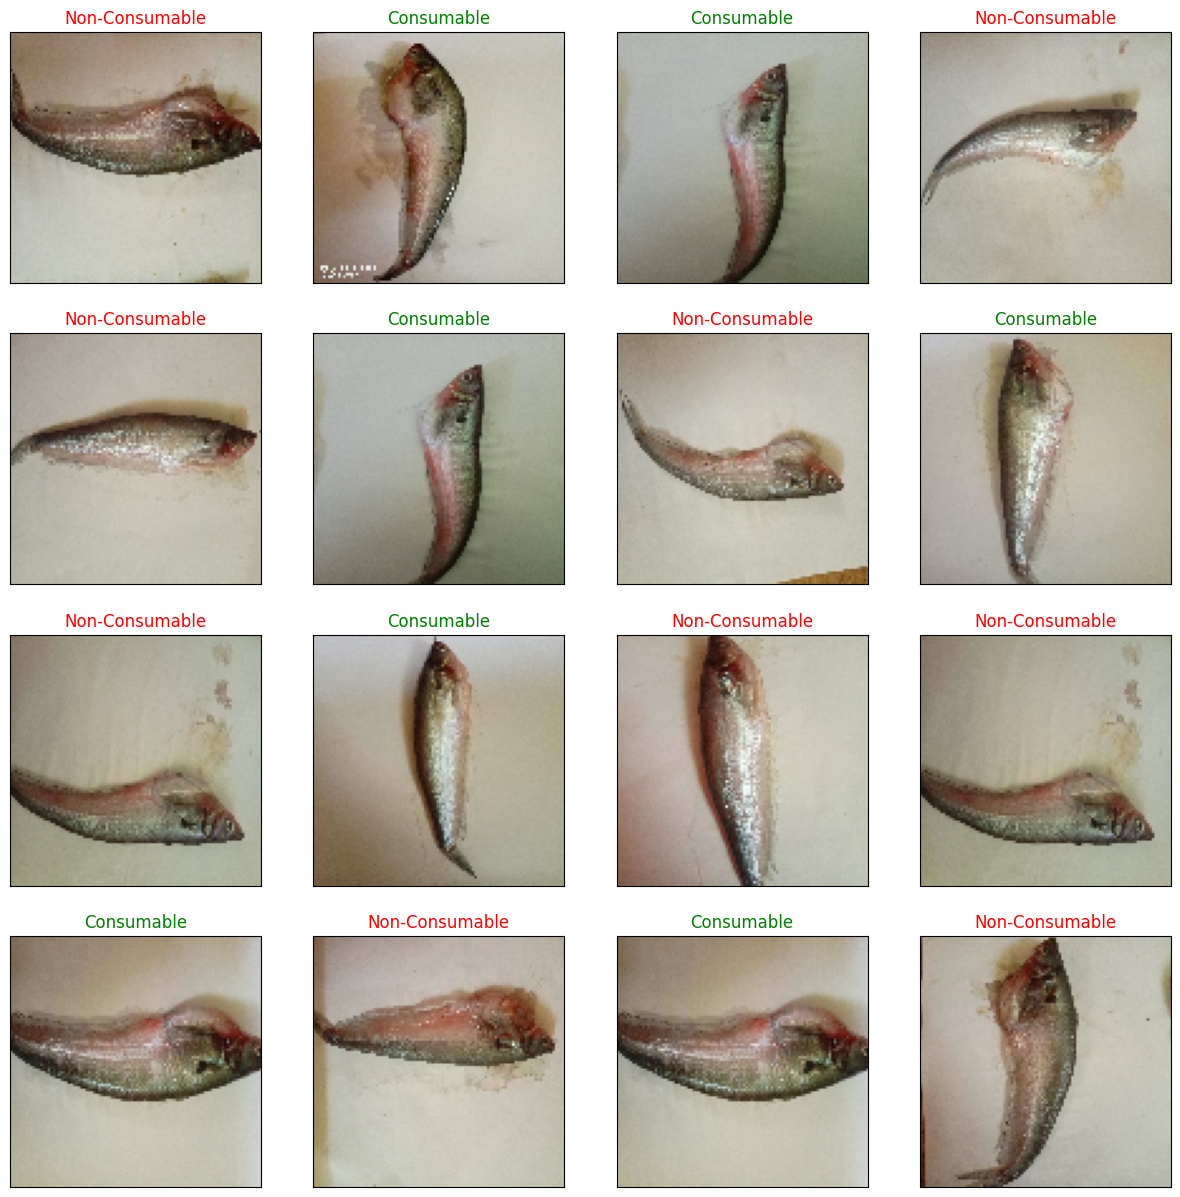

In [13]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
# Making labels for the data
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [15]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [16]:
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

C:\Users\rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.5984 - loss: 2.9480 - val_accuracy: 0.4762 - val_loss: 0.7455
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.3860 - loss: 0.7912 - val_accuracy: 0.5238 - val_loss: 0.6924
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.6013 - loss: 0.6816 - val_accuracy: 0.5238 - val_loss: 0.7007
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5888 - loss: 0.6791 - val_accuracy: 0.5238 - val_loss: 0.6916
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.4527 - loss: 0.6940 - val_accuracy: 0.5714 - val_loss: 0.6929
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.6023 - loss: 0.6916 - val_accuracy: 0.5238 - val_loss: 0.6951
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.5805 - loss: 0.6771 - val_accuracy: 0.5238 - val_loss: 0.7042
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5805 - loss: 0.6779 - val_accuracy: 0.5238 - val_loss:

2/2 - 0s - 55ms/step - accuracy: 0.6190 - loss: 0.6748


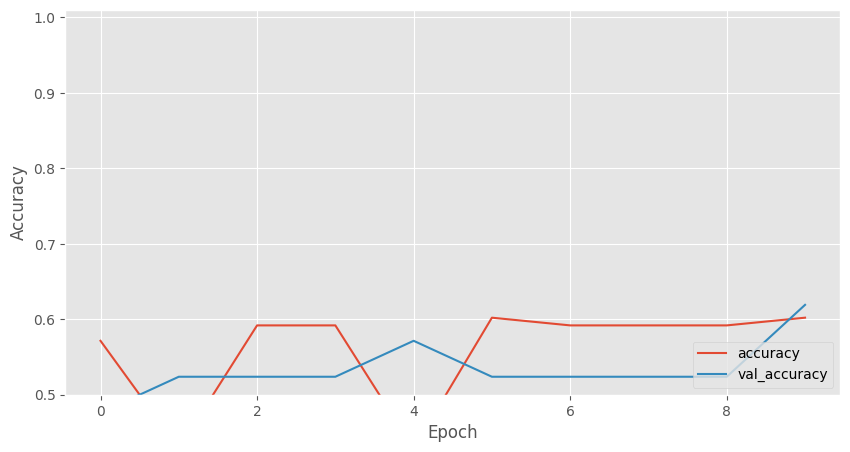

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [19]:
result=model.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6314 - loss: 0.6730


In [20]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.6747575402259827
compile_metrics : 0.6190476417541504


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


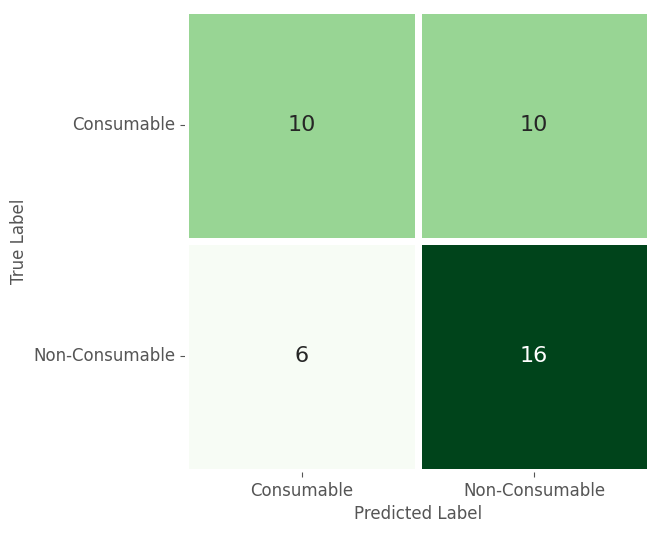

In [21]:
y_pred = model.predict(test_images)
def toClass(pred):
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
    return class_
cm = confusion_matrix(test_labels,toClass(y_pred))
df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.show()

In [23]:
model = models.Sequential()

In [24]:
files = ['Consumable', 'Non-Consumable']
address = 'D:/VIT/Meat-Quality-Assessment-and-Classification/Dataset/Fish/'

In [25]:
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

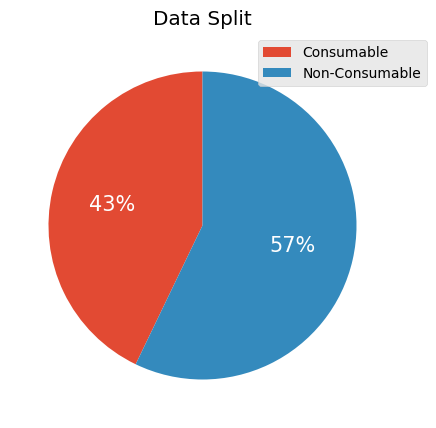

In [26]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [27]:
width = 100
height = 100

In [29]:
start = time.time()
image_data = []
image_target = []
for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 34.71983


In [30]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(140, 100, 100, 3)

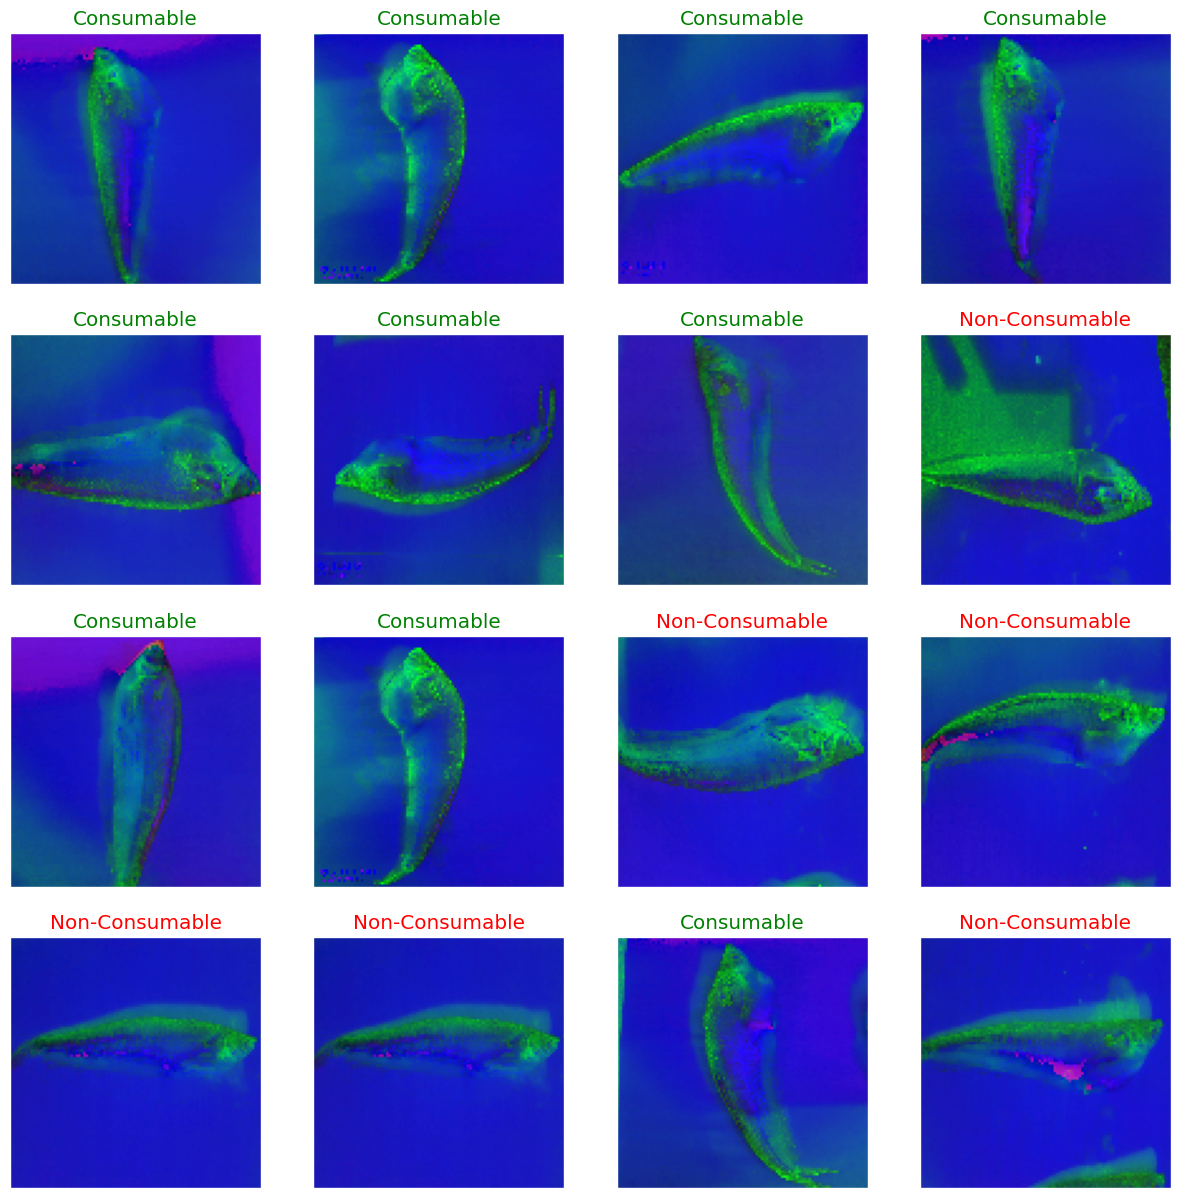

In [31]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [32]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [33]:
X = image_data / 360.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [34]:
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

C:\Users\rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.4647 - loss: 0.7658 - val_accuracy: 0.6667 - val_loss: 0.6864
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6946 - loss: 0.6852 - val_accuracy: 0.5238 - val_loss: 0.6736
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.5877 - loss: 0.6805 - val_accuracy: 0.6190 - val_loss: 0.6855
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.6455 - loss: 0.6861 - val_accuracy: 0.5238 - val_loss: 0.6739
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6305 - loss: 0.6626 - val_accuracy: 0.6905 - val_loss: 0.6518
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6580 - loss: 0.6422 - val_accuracy: 0.6667 - val_loss: 0.6406
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6673 - loss: 0.6248 - val_accuracy: 0.6667 - val_loss: 0.6570
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7479 - loss: 0.5807 - val_accuracy: 0.5476 - val_loss:

2/2 - 0s - 60ms/step - accuracy: 0.5476 - loss: 0.7965


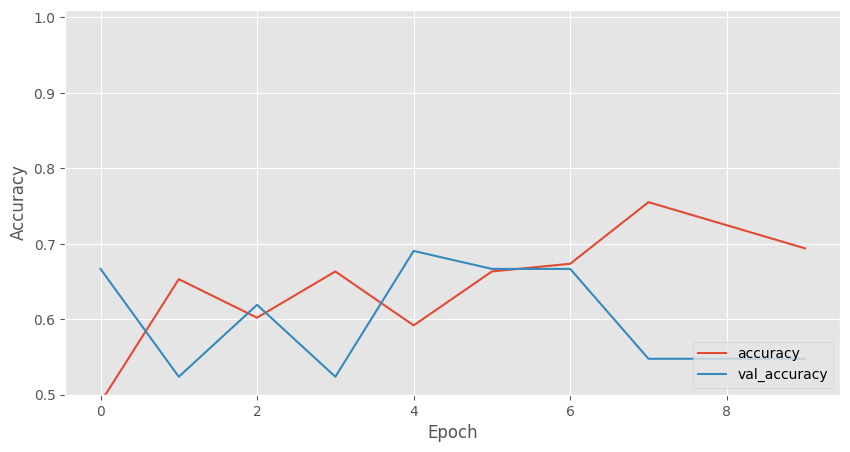

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [37]:
result=model.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5422 - loss: 0.8103


In [38]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.7964810132980347
compile_metrics : 0.5476190447807312


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


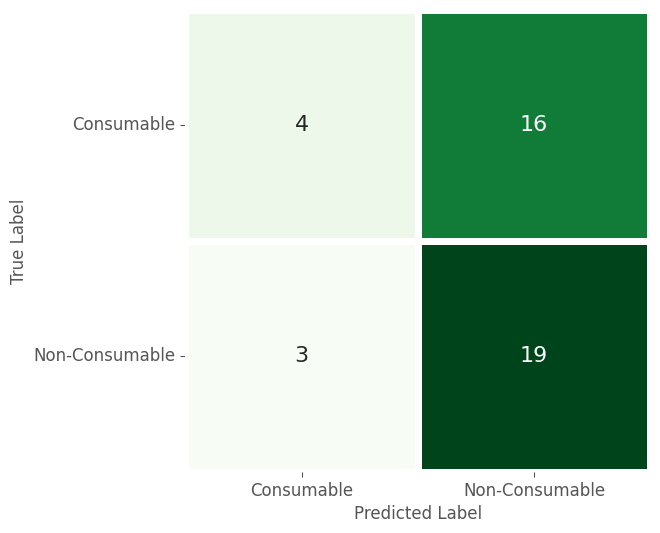

In [39]:
y_pred = model.predict(test_images)
def toClass(pred):
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
    return class_
cm = confusion_matrix(test_labels,toClass(y_pred))
df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.show()